In [1]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
sys.path.append(os.path.dirname(os.getcwd()))
from py_funcs.func_ml import *
from py_funcs.func_query_mimic import *
from py_funcs.func_project_dir import *

In [14]:
n_icustays_stage_1 = len(pd.read_csv(project_path()+r"/data/extracted_data/subjects.csv", index_col=0)["ICUSTAY_ID"].unique())
n_icustays_stage_2 = len(pd.read_csv(project_path()+r"/data/temp_data/df_subjects_reduced.csv", index_col=0)["ICUSTAY_ID"].unique())
n_icustays_stage_3 = pd.read_csv(project_path()+r"/data/target_data/df_sepsis_flag.csv", index_col=0).groupby("ICUSTAY_ID")["SEPSIS_FLAG"].max().value_counts()
n_icustays_stage_4_1 = pd.read_csv(project_path()+r"/data/target_data/df_ml_testing.csv", index_col=0)
n_icustays_stage_4_1 = n_icustays_stage_4_1[n_icustays_stage_4_1["SEPSIS_ONSET_HOUR"] >= 5].groupby("ICUSTAY_ID")["SEPSIS_LABEL"].max().value_counts()

n_icustays_stage_4_2 = pd.read_csv(project_path()+r"/data/target_data/df_ml.csv", index_col=0)
n_icustays_stage_4_2 = n_icustays_stage_4_2[n_icustays_stage_4_2["SEPSIS_ONSET_HOUR"] >= 5].groupby("ICUSTAY_ID")["SEPSIS_LABEL"].max().value_counts()

In [43]:
print("ICUSTAYS after removed newborn:", n_icustays_stage_1)
print(50*"-")
print("ICUSTAYS after removed 50% missing columns\n\
Sepsis like admission\n\
Age <= 14\n\
multiple ICUSTAYS:", n_icustays_stage_2)
print(50*"-")
print("After Sepsis Flagging", n_icustays_stage_3)
print(50*"-")
print("Sepsis no Sepsis matching (not balanced)", n_icustays_stage_4_1)
print(50*"-")
print("Sepsis no Sepsis matching (balanced)", n_icustays_stage_4_2)

ICUSTAYS after removed newborn: 53432
--------------------------------------------------
ICUSTAYS after removed 50% missing columns
Sepsis like admission
Age <= 14
multiple ICUSTAYS: 23066
--------------------------------------------------
After Sepsis Flagging SEPSIS_FLAG
0    15151
1     7913
Name: count, dtype: int64
--------------------------------------------------
Sepsis no Sepsis matching (not balanced) SEPSIS_LABEL
0    12890
1     5713
Name: count, dtype: int64
--------------------------------------------------
Sepsis no Sepsis matching (balanced) SEPSIS_LABEL
1    5713
0    5713
Name: count, dtype: int64


In [2]:
df_subjects = pd.read_csv(project_path()+r"/data/extracted_data/subjects.csv", index_col=0)
df_subjects["INTIME"] = pd.to_datetime(df_subjects["INTIME"])
df_subjects["OUTTIME"] = pd.to_datetime(df_subjects["OUTTIME"])
df_subjects["ICUSTAY_LEN"] = (df_subjects["OUTTIME"] - df_subjects["INTIME"]).dt.seconds / 60**2
df_subjects = df_subjects[['ICUSTAY_ID', 'DIAGNOSIS', 'ETHNICITY', 'GENDER', 'AGE', 'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'DBSOURCE', 'ICUSTAY_LEN']]
df_ml           = pd.read_csv(project_path()+r"/data/target_data/df_ml.csv", index_col=0)
df_ml_testing   = pd.read_csv(project_path()+r"/data/target_data/df_ml_testing.csv", index_col=0)

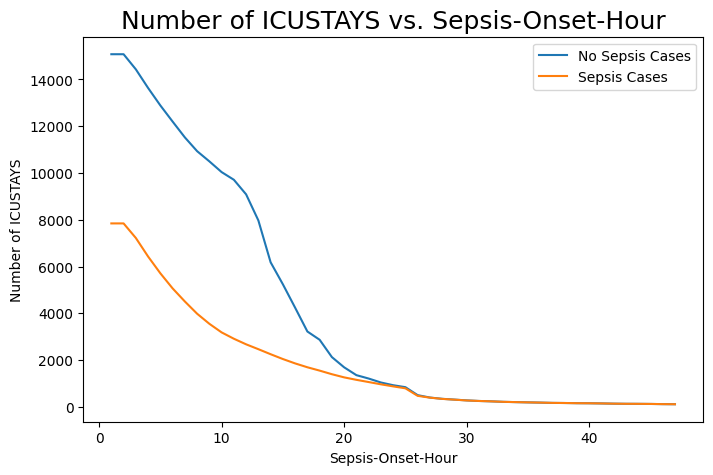

In [27]:
hours = []
sepsis = []
no_sepsis = []
for hour in range(1,48):
    temp = df_ml_testing[df_ml_testing["SEPSIS_ONSET_HOUR"] >= hour] 
    cases = temp.groupby("ICUSTAY_ID")["SEPSIS_LABEL"].max().value_counts()
    hours.append(hour)
    sepsis.append(cases[1])
    no_sepsis.append(cases[0])


plt.figure(figsize=(8,5))
plt.title("Number of ICUSTAYS vs. Sepsis-Onset-Hour", fontsize=18)
plt.plot(hours, no_sepsis)
plt.plot(hours, sepsis)
plt.legend(["No Sepsis Cases", "Sepsis Cases"])
plt.xlabel("Sepsis-Onset-Hour")
plt.ylabel("Number of ICUSTAYS")
plt.show()